In [1]:
## Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
## Data: https://www.kaggle.com/noulam/tomato

In [10]:
## Load data
train_path=r"/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/" # '/kaggle/input/cat-and-dog/training_set/training_set'
test_path=r"/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid/"  #'../input/cat-and-dog/test_set/test_set'


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_path,target_size=(224,224),batch_size=45)
test=ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path,target_size=(224,224),batch_size=45,shuffle=True)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [11]:
np.unique(train.classes)   # 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

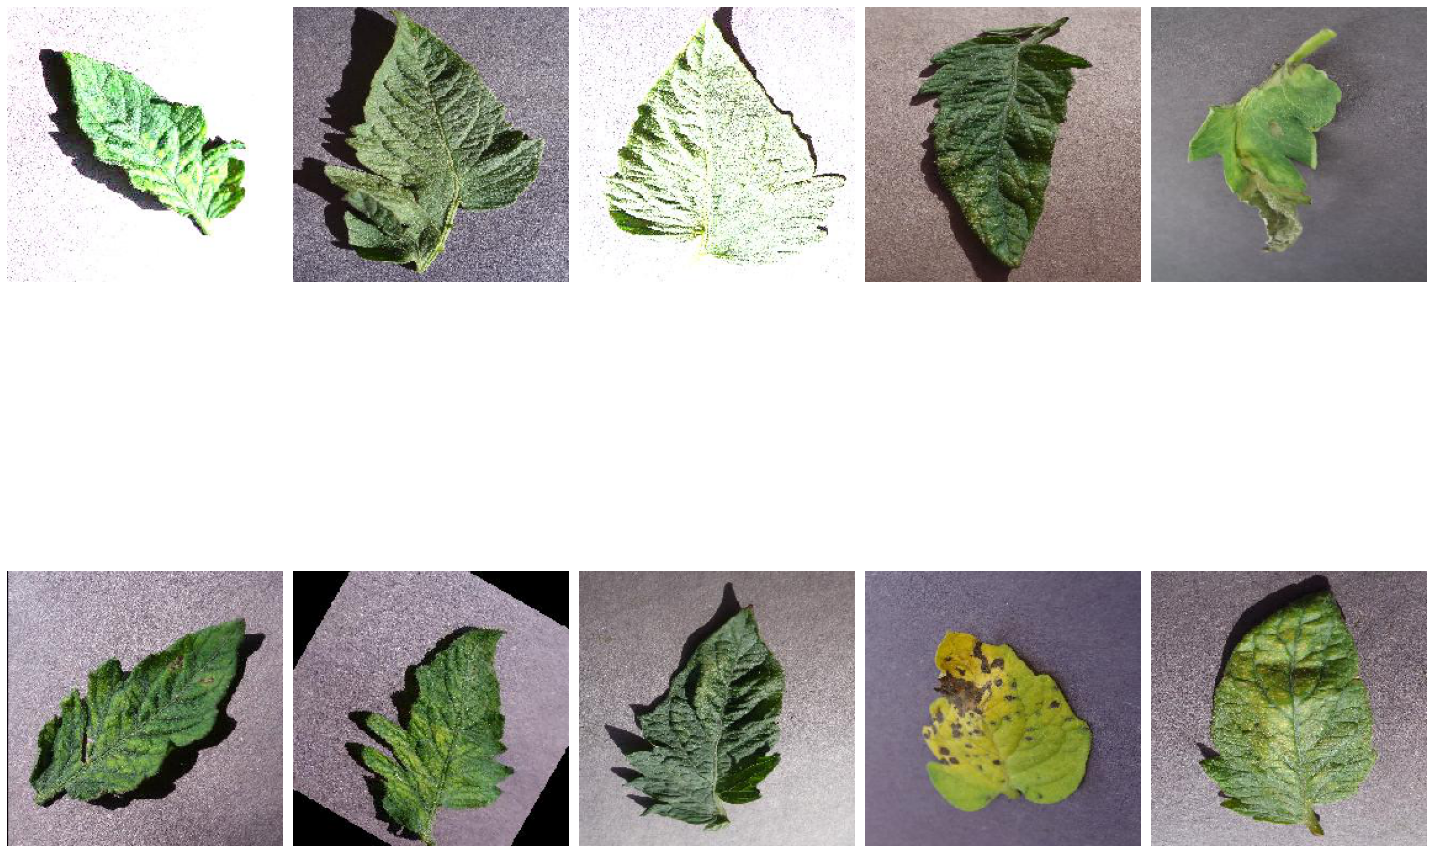

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0.

In [12]:
## Train-Batch Visualization:
import matplotlib.pyplot as plt
%matplotlib inline

imgs,label=next(train)
def plotImages(img_arr):
    fig,axes=plt.subplots(2,5,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(img_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(label)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

def convolutional_model():
    ## create model
    model=Sequential()
    model.add(Conv2D(32,(3,3),strides=(1,1),activation='relu',input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    model.add(Conv2D(64,(5,5),strides=(1,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(64,(5,5),strides=(1,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    ## Model Compile
    model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

    
    return model
    

model=convolutional_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 107, 107, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 49, 49, 64)        102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)            

In [15]:
## Early Stpping
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

## Model Training
history=model.fit(x=train,steps_per_epoch=len(train),epochs=20,verbose=1,callbacks=[callback])

Epoch 1/20
408/408 [==============================] - 109s 263ms/step - loss: 1.6624 - accuracy: 0.4167
Epoch 2/20
408/408 [==============================] - 53s 130ms/step - loss: 0.7091 - accuracy: 0.7543
Epoch 3/20
408/408 [==============================] - 52s 127ms/step - loss: 0.5036 - accuracy: 0.8287
Epoch 4/20
408/408 [==============================] - 53s 130ms/step - loss: 0.3978 - accuracy: 0.8625
Epoch 5/20
408/408 [==============================] - 53s 129ms/step - loss: 0.3323 - accuracy: 0.8853
Epoch 6/20
408/408 [==============================] - 53s 130ms/step - loss: 0.2795 - accuracy: 0.9048
Epoch 7/20
408/408 [==============================] - 55s 134ms/step - loss: 0.2337 - accuracy: 0.9236
Epoch 8/20
408/408 [==============================] - 56s 136ms/step - loss: 0.2090 - accuracy: 0.9313
Epoch 9/20
408/408 [==============================] - 56s 138ms/step - loss: 0.1727 - accuracy: 0.9436
Epoch 10/20
408/408 [==============================] - 56s 137ms/step - 

In [16]:
## Prediction
pred=model.predict(x=test,steps=len(test),verbose=1)
pred

102/102 [==============================] - 35s 347ms/step


array([[2.79237549e-12, 1.27589406e-09, 3.06566079e-08, ...,
        9.99997497e-01, 1.32942103e-19, 1.07749526e-16],
       [2.41519332e-10, 1.22901938e-08, 5.63261000e-11, ...,
        3.60364476e-16, 5.17592294e-16, 1.39302259e-08],
       [9.99974489e-01, 2.47125627e-05, 6.20474907e-07, ...,
        1.01621232e-07, 1.73322086e-11, 6.46835694e-14],
       ...,
       [9.98206258e-01, 1.27682128e-04, 3.50986433e-04, ...,
        6.52039432e-07, 5.77046549e-13, 3.69532516e-09],
       [4.30001940e-16, 4.65613539e-06, 6.39688551e-07, ...,
        8.51496337e-14, 3.14976717e-07, 5.46814989e-11],
       [1.60987437e-08, 3.84268830e-08, 2.52786180e-04, ...,
        9.76197654e-04, 1.92668960e-20, 1.72475193e-13]], dtype=float32)

In [25]:
## Confussion-Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes,y_pred=np.argmax(pred,axis=1))

array([[44, 31, 49, 43, 30, 41, 39, 51, 44, 53],
       [41, 55, 43, 44, 47, 60, 46, 52, 52, 40],
       [46, 39, 47, 41, 42, 44, 58, 36, 47, 63],
       [43, 44, 53, 49, 44, 54, 43, 51, 47, 42],
       [42, 48, 35, 60, 34, 39, 50, 43, 42, 43],
       [47, 42, 41, 41, 39, 39, 49, 40, 46, 51],
       [53, 51, 52, 44, 33, 38, 51, 47, 43, 45],
       [50, 54, 46, 53, 41, 49, 44, 58, 38, 57],
       [37, 43, 47, 45, 53, 41, 38, 61, 40, 43],
       [47, 49, 49, 43, 50, 44, 42, 55, 38, 64]])

In [19]:
y_pred=np.argmax(pred,axis=1)
y_pred

array([7, 6, 0, ..., 0, 3, 5])

In [27]:
## Evaluation Score
score=model.evaluate(test)
score               # loss:0.2836 && accuracy:0.9228

102/102 [==============================] - 12s 114ms/step - loss: 0.2836 - accuracy: 0.9228


[0.2835752069950104, 0.9227917194366455]

In [28]:
## Plotting Score & Loss Curve

acc=history.history['accuracy']
#val_acc=history.history['val_accuracy']
loss=history.history['loss']
#val_loss=history.history['val_loss']

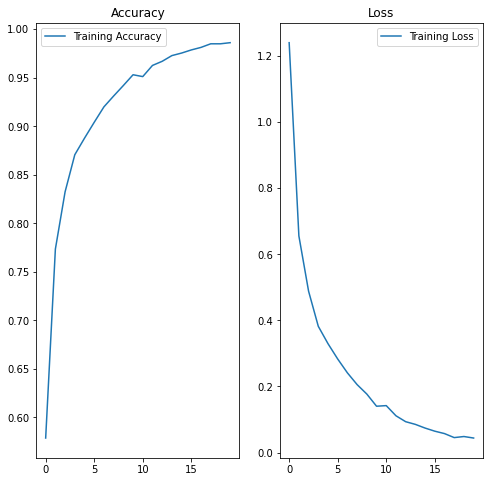

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(20),acc,label='Training Accuracy')
#plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(20),loss,label='Training Loss')
#plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')
plt.show()

In [33]:
import numpy as np
for images_batch, labels_in test_ds.take(1):
    
    train=images_batch[0].numpy().astype('uint8')
    test=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

NameError: name 'test_ds' is not defined